In [5]:
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:

server_url = "http://127.0.0.1:8000"  # Server endpoint
response = requests.get(f"{server_url}/get-global-parameters")
print(response.json())
global_model=response.json()
coef = np.array(global_model['coef']).flatten()  # Use flatten to convert 2D array to 1D if needed
intercept = global_model['intercept_']

node_file = "./Datasets/node8.csv"
data = pd.read_csv(node_file)

# Extract features (all columns except the 9th one)
local_dataset = data.drop(columns=data.columns[9]).values  # Drop the 9th column for features

# Extract labels (9th column)
y_test = data.iloc[:, 9].values  # Select the 9th column for labels

FLregressor = LinearRegression()

FLregressor.coef_ = coef.copy()
FLregressor.intercept_ = intercept

{'coef': [[-115366982092.97192, 9027566722.142593, 123246063493.11908, 123246063493.11516, -1148485322.010971, -1148485321.99292, 123246063493.11205, 123246063493.1374, 123246063493.11168, 0.20075575510660806, -0.03302868207295736, 0.7464753786722819, 0.13676430781682333, 0.028783639272054035, -0.00242559394488732, 0.055961926778157554]], 'intercept_': -7879081400.178243}


In [7]:
y_pred= FLregressor.predict(local_dataset)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2) #With FL

0.985388310571681


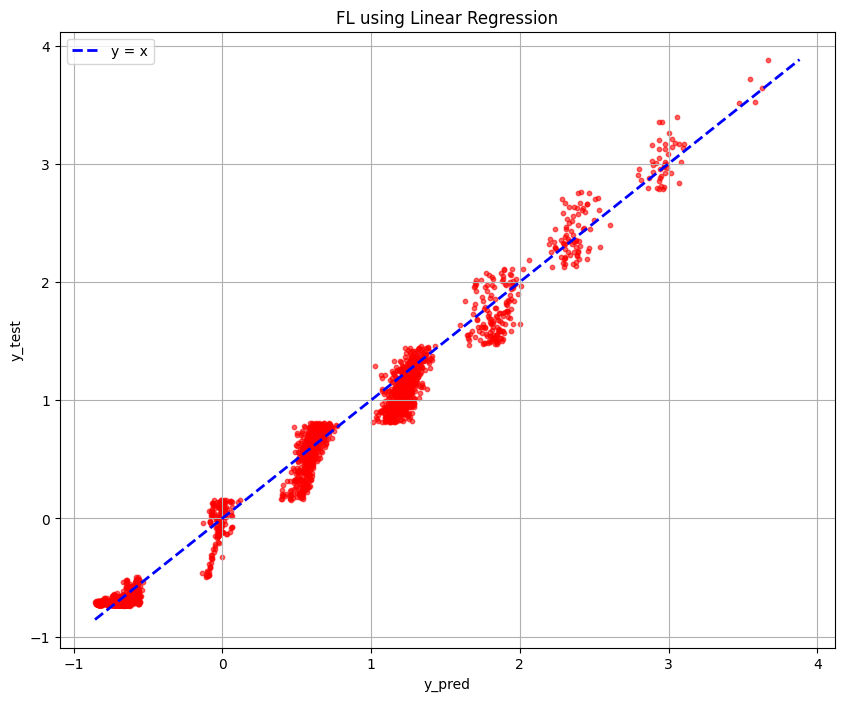

In [8]:
# Increase figure size for better readability
plt.figure(figsize=(10, 8))

# Scatter plot with smaller markers and added transparency
plt.scatter(y_pred, y_test, color='red', s=10, alpha=0.6)

# Plot y=x line with increased thickness for clarity
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='y = x')

# Adding title and labels
plt.title("FL using Linear Regression")
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.legend()  # Show the legend
plt.grid(True)  # Add a grid for easier reading

# Show the plot
plt.show()